Suppose that we have four observations, for which we compute a
dissimilarity matrix, given by
$$
\begin{bmatrix}
    & 0.3 & 0.4 & 0.7 \\
0.3 &     & 0.5 & 0.8 \\
0.4 & 0.5 &     & 0.45 \\
0.7 & 0.8 & 0.45 & 
\end{bmatrix}
$$
For instance, the dissimilarity between the first and second observations is 0.3, and the dissimilarity between the second and fourth
observations is 0.8.

import library

In [10]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
from collections import defaultdict

(a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.

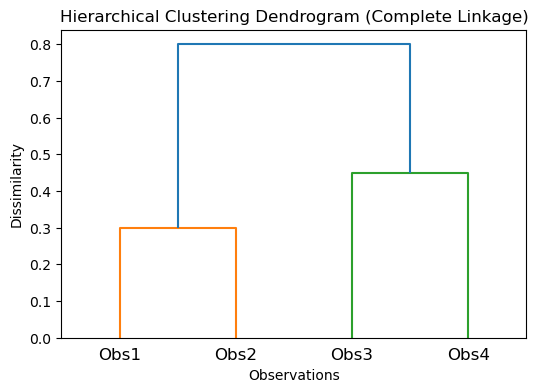

In [12]:
matrix = np.array([[0, 0.3, 0.4, 0.7], 
                   [0.3, 0, 0.5, 0.8], 
                   [0.4, 0.5, 0, 0.45], 
                   [0.7, 0.8, 0.45, 0]])

condensed_matrix = squareform(matrix)
Z_1 = linkage(condensed_matrix, method='complete')

plt.figure(figsize=(6, 4))
dendrogram(Z_1, labels=["Obs1", "Obs2", "Obs3", "Obs4"])
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
plt.xlabel("Observations")
plt.ylabel("Dissimilarity")
plt.show()


(b) Repeat (a), this time using single linkage clustering.

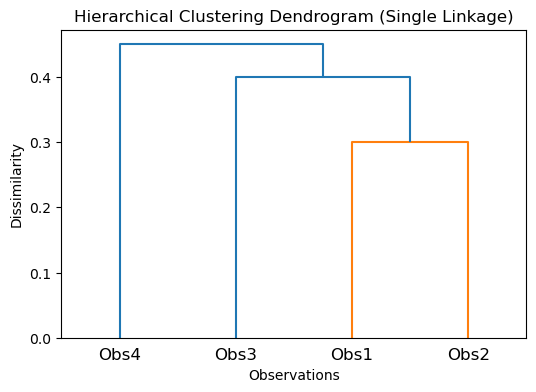

In [7]:
Z_2 = linkage(condensed_matrix, method='single')

plt.figure(figsize=(6, 4))
dendrogram(Z_2, labels=["Obs1", "Obs2", "Obs3", "Obs4"])
plt.title("Hierarchical Clustering Dendrogram (Single Linkage)")
plt.xlabel("Observations")
plt.ylabel("Dissimilarity")
plt.show()

(c) Suppose that we cut the dendrogram obtained in (a) such that two clusters result. Which observations are in each cluster?

In [13]:
# 切成 2 群
clusters = fcluster(Z_1, t=2, criterion='maxclust')

# 把結果整理成 dict
cluster_dict = defaultdict(list)
for i, c in enumerate(clusters, start=1):  # i=1,2,3,4
    cluster_dict[c].append(f"observation{i}")

# 輸出
for cluster_id, members in cluster_dict.items():
    print(f"cluster{cluster_id}: {{{', '.join(members)}}}")

cluster1: {observation1, observation2}
cluster2: {observation3, observation4}


(d) Suppose that we cut the dendrogram obtained in (b) such that two clusters result. Which observations are in each cluster?

In [14]:
# 切成 2 群
clusters = fcluster(Z_2, t=2, criterion='maxclust')

# 把結果整理成 dict
cluster_dict = defaultdict(list)
for i, c in enumerate(clusters, start=1):  # i=1,2,3,4
    cluster_dict[c].append(f"observation{i}")

# 輸出
for cluster_id, members in cluster_dict.items():
    print(f"cluster{cluster_id}: {{{', '.join(members)}}}")

cluster1: {observation1, observation2, observation3}
cluster2: {observation4}


(e) It is mentioned in this chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

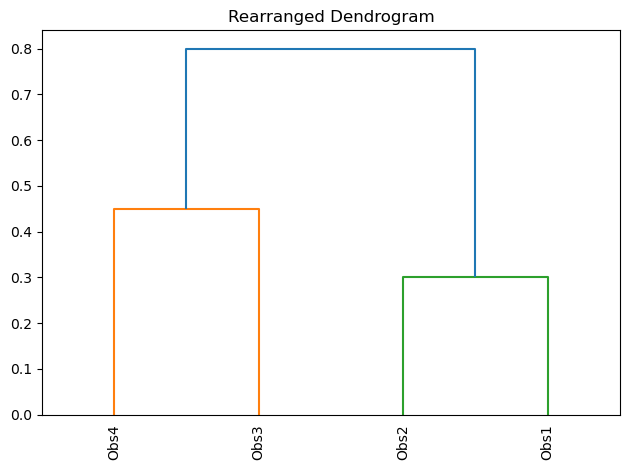

In [16]:
dendrogram(Z_1, labels=["Obs1", "Obs2", "Obs3", "Obs4"], leaf_rotation=90, 
           leaf_font_size=10, orientation='top', count_sort='descending')
plt.title("Rearranged Dendrogram")

plt.tight_layout()
plt.show()